In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# LAB2

## STEP 1

In [8]:
df = pd.read_csv('Documentation/lab2_data.csv', )
df

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance
0,1,Motorcycle,0.0,0.000
1,1,Motorcycle,0.4,0.000
2,1,Motorcycle,0.8,0.000
3,1,Motorcycle,1.2,0.000
4,1,Motorcycle,1.6,0.000
...,...,...,...,...
580205,2476,Car,952.8,11.846
580206,2477,Car,951.6,0.000
580207,2477,Car,952.0,3.387
580208,2477,Car,952.4,6.944


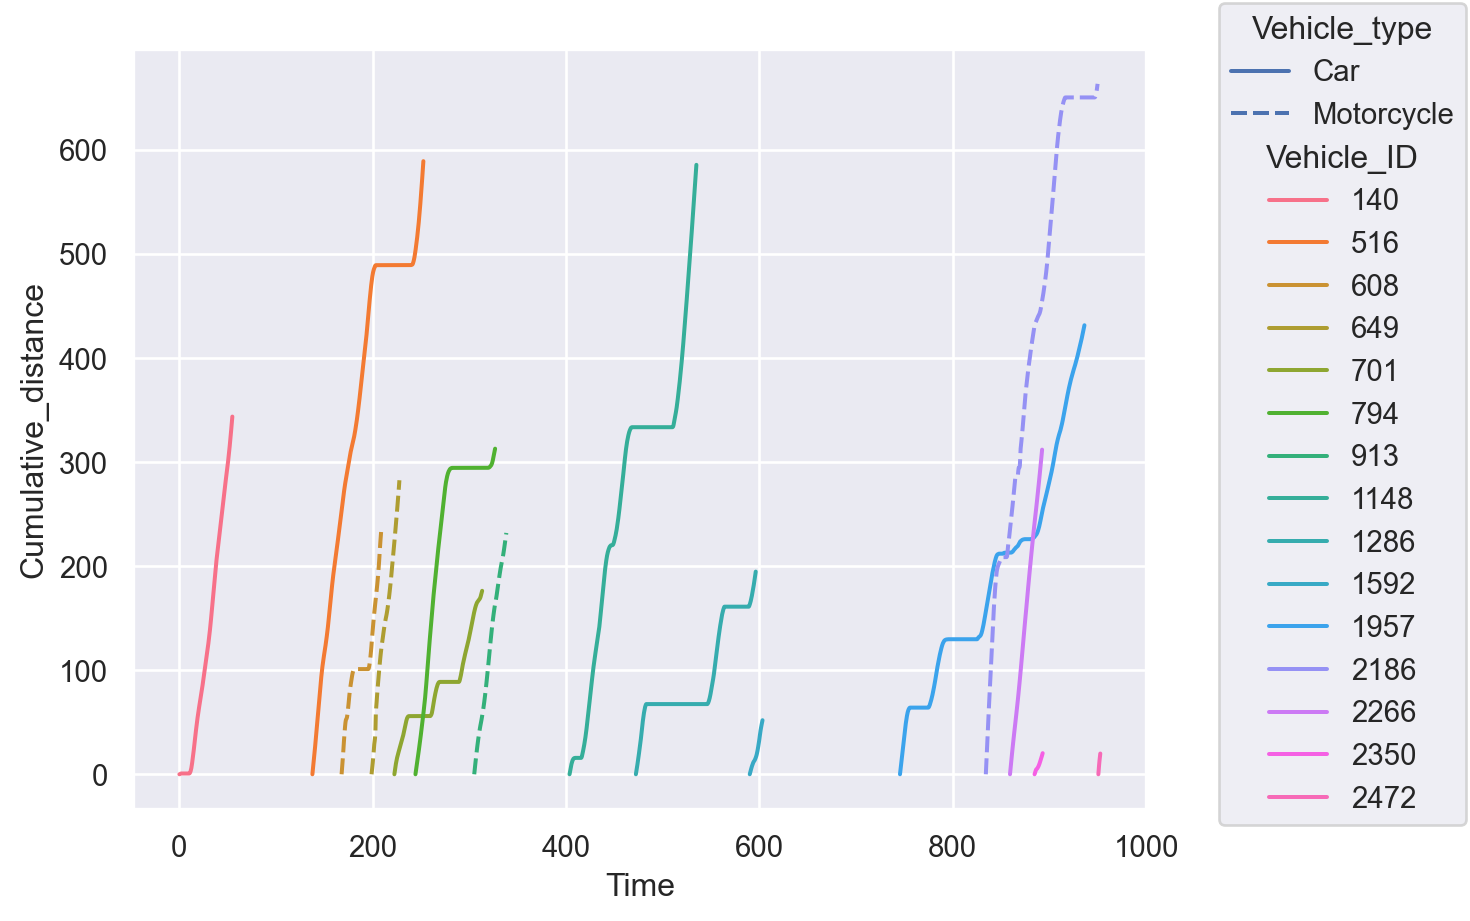

In [75]:
sample = np.random.choice(df.Vehicle_ID.unique(),15)
(
    so.Plot(df.loc[df.Vehicle_ID.isin(sample)], x="Time", y="Cumulative_distance", linestyle="Vehicle_type", color="Vehicle_ID")
    .add(so.Line())
    .scale(color=so.Nominal())
    .plot()
)

In [27]:
#Create distance, speed and acceleration in function of time
df["distance"] = df.groupby("Vehicle_ID")["Cumulative_distance"].diff()
df["dt"] = df.groupby("Vehicle_ID")["Time"].diff()
df["speed"] = df.distance / df.dt
df["acceleration"] = df.speed / df.dt

df

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance,distance,speed,dt,acceleration
0,1,Motorcycle,0.0,0.000,NaN,NaN,NaN,NaN
1,1,Motorcycle,0.4,0.000,0.000,0.0000,0.4,0.00000
2,1,Motorcycle,0.8,0.000,0.000,0.0000,0.4,0.00000
3,1,Motorcycle,1.2,0.000,0.000,0.0000,0.4,0.00000
4,1,Motorcycle,1.6,0.000,0.000,0.0000,0.4,0.00000
...,...,...,...,...,...,...,...,...
580205,2476,Car,952.8,11.846,2.524,6.3100,0.4,15.77500
580206,2477,Car,951.6,0.000,NaN,NaN,NaN,NaN
580207,2477,Car,952.0,3.387,3.387,8.4675,0.4,21.16875
580208,2477,Car,952.4,6.944,3.557,8.8925,0.4,22.23125


In [81]:
#Determine operating mode :
df["mode"] = df.apply(axis=1, func = lambda x: "ACC" if x.acceleration>0.5 else "DEC" if x.acceleration < -0.5 else "CRUISING" if x.speed > 0.28 else "IDLE")
df.mode.unique()

AttributeError: 'function' object has no attribute 'unique'